# 유로 2012 데이터 탐색


### 데이터 : 유로 2012 16강 진출 팀 정보

### 1. 기초 정보 탐색


### 2. 인사이트 발견(탐색, 시각화)


### 3. 데이터 전처리


### 4. 탐색적 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data 불러오기
euro = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv",sep = ',')

In [3]:
euro.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [4]:
# 결측값 확인
print(euro.isnull().sum())
print("-----------------------------------------------")
print(euro.dtypes)

Team                          0
Goals                         0
Shots on target               0
Shots off target              0
Shooting Accuracy             0
% Goals-to-shots              0
Total shots (inc. Blocked)    0
Hit Woodwork                  0
Penalty goals                 0
Penalties not scored          0
Headed goals                  0
Passes                        0
Passes completed              0
Passing Accuracy              0
Touches                       0
Crosses                       0
Dribbles                      0
Corners Taken                 0
Tackles                       0
Clearances                    0
Interceptions                 0
Clearances off line           1
Clean Sheets                  0
Blocks                        0
Goals conceded                0
Saves made                    0
Saves-to-shots ratio          0
Fouls Won                     0
Fouls Conceded                0
Offsides                      0
Yellow Cards                  0
Red Card

In [5]:
print(euro.shape)
print("---------------------------------------")
print(euro.info())

(16, 35)
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
Team                          16 non-null object
Goals                         16 non-null int64
Shots on target               16 non-null int64
Shots off target              16 non-null int64
Shooting Accuracy             16 non-null object
% Goals-to-shots              16 non-null object
Total shots (inc. Blocked)    16 non-null int64
Hit Woodwork                  16 non-null int64
Penalty goals                 16 non-null int64
Penalties not scored          16 non-null int64
Headed goals                  16 non-null int64
Passes                        16 non-null int64
Passes completed              16 non-null int64
Passing Accuracy              16 non-null object
Touches                       16 non-null int64
Crosses                       16 non-null int64
Dribbles                      16 non-null int64
Corners Taken               

총 16개의 row와 35개의 컬럼을 가지고 있다.

In [6]:
# 요약 통계
euro.describe()

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.00000,16.000000
mean,4.750000,17.125000,24.937500,54.937500,1.250000,0.187500,0.0625,1.375000,1763.375000,1467.375000,...,4.750000,12.125000,52.937500,55.625000,8.125000,7.437500,0.187500,10.87500,10.87500,17.250000
std,2.886751,10.582218,10.680005,26.065223,1.612452,0.403113,0.2500,1.024695,906.177898,827.580721,...,1.983263,4.573474,22.915697,18.973227,4.910872,3.265348,0.403113,3.53789,3.53789,1.527525
min,1.000000,7.000000,10.000000,27.000000,0.000000,0.000000,0.0000,0.000000,851.000000,606.000000,...,1.000000,6.000000,25.000000,30.000000,2.000000,4.000000,0.000000,7.00000,7.00000,15.000000
25%,2.750000,9.750000,18.000000,36.500000,0.000000,0.000000,0.0000,0.750000,1190.750000,951.500000,...,3.000000,9.750000,35.750000,44.500000,4.000000,5.000000,0.000000,8.50000,8.50000,16.000000
50%,4.500000,13.000000,23.500000,44.000000,1.000000,0.000000,0.0000,1.500000,1522.000000,1211.500000,...,5.000000,11.000000,45.500000,51.000000,7.500000,6.500000,0.000000,10.50000,10.50000,17.000000
75%,5.250000,22.000000,32.250000,68.750000,2.000000,0.000000,0.0000,2.000000,1934.750000,1546.500000,...,6.000000,13.500000,64.000000,64.750000,11.250000,9.000000,0.000000,12.50000,12.50000,18.250000
max,12.000000,42.000000,45.000000,110.000000,6.000000,1.000000,1.0000,3.000000,4317.000000,3820.000000,...,9.000000,22.000000,102.000000,90.000000,19.000000,16.000000,1.000000,18.00000,18.00000,20.000000


In [7]:
# index를 팀명으로 지정
euro = euro.set_index("Team")
euro.head()

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Team,,,,,,,,,,,,,,,,,,,,,
Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,...,13,81.3%,41,62,2,9,0,9,9,16
Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,...,10,66.7%,25,38,8,4,0,7,7,15
England,5,11,18,50.0%,17.2%,40,0,0,0,3,...,22,88.1%,43,45,6,5,0,11,11,16
France,3,22,24,37.9%,6.5%,65,1,0,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


### 16강까지 골 수 확인

In [8]:
# 골을 많이 넣은 순으로 정렬
euro_goal = euro['Goals'].sort_values(ascending = False)
euro_goal

Team
Spain                  12
Germany                10
Portugal                6
Italy                   6
Sweden                  5
Russia                  5
Greece                  5
England                 5
Denmark                 4
Czech Republic          4
Croatia                 4
France                  3
Ukraine                 2
Poland                  2
Netherlands             2
Republic of Ireland     1
Name: Goals, dtype: int64

In [9]:
# 팀별 골 수 정렬
euro_goal = euro.groupby('Team')['Goals'].sum()
euro_goal = euro_goal.sort_values(ascending = False)
euro_goal

Team
Spain                  12
Germany                10
Portugal                6
Italy                   6
Sweden                  5
Russia                  5
Greece                  5
England                 5
Denmark                 4
Czech Republic          4
Croatia                 4
France                  3
Ukraine                 2
Poland                  2
Netherlands             2
Republic of Ireland     1
Name: Goals, dtype: int64

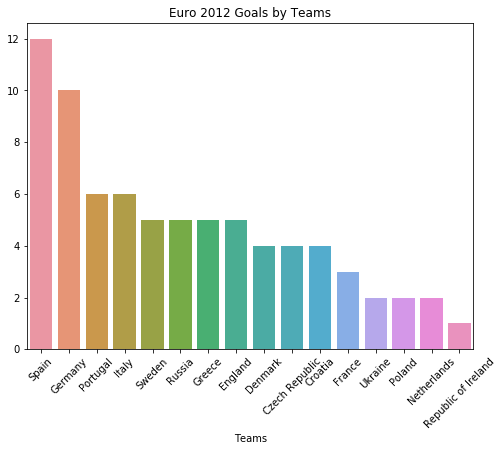

In [10]:
goal_idx = euro_goal.index.tolist()

# 팀 명을 번호로
x_pos = goal_idx
goals_pos = euro_goal.values.tolist()
plt.figure(figsize = (8,6))
sns.barplot(x_pos,goals_pos)
plt.title("Euro 2012 Goals by Teams")
plt.xlabel("Teams")
plt.xticks(rotation = 45)
plt.show()

각각 12,10골로 spain과 germany가 압도적으로 골을 많이 넣었다.

### 데이터 % 없애기

몇몇 수치 데이터에 %가 들어가있어 요약이 어려움

-> % 제거

In [11]:
# %가 들어가 있는 데이터들
euro[['Shooting Accuracy','% Goals-to-shots','Passing Accuracy','Saves-to-shots ratio']]

,Shooting Accuracy,% Goals-to-shots,Passing Accuracy,Saves-to-shots ratio
Team,,,,
Croatia,51.9%,16.0%,76.9%,81.3%
Czech Republic,41.9%,12.9%,78.1%,60.1%
Denmark,50.0%,20.0%,83.3%,66.7%
England,50.0%,17.2%,80.6%,88.1%
France,37.9%,6.5%,87.2%,54.6%
Germany,47.8%,15.6%,87.4%,62.6%
Greece,30.7%,19.2%,76.7%,65.1%
Italy,43.0%,7.5%,83.9%,74.1%
Netherlands,25.0%,4.1%,88.7%,70.6%


In [12]:
# 각 열별 %를 제외
def not_pct(df,col) :
    df[col] = df[col].apply((lambda x : float(x[:-1])))
    return df[col]

In [13]:
not_pct(euro,'Passing Accuracy')
not_pct(euro,'% Goals-to-shots')
not_pct(euro,'Saves-to-shots ratio')
not_pct(euro,'Shooting Accuracy')

Team
Croatia                51.9
Czech Republic         41.9
Denmark                50.0
England                50.0
France                 37.9
Germany                47.8
Greece                 30.7
Italy                  43.0
Netherlands            25.0
Poland                 39.4
Portugal               34.3
Republic of Ireland    36.8
Russia                 22.5
Spain                  55.9
Sweden                 47.2
Ukraine                21.2
Name: Shooting Accuracy, dtype: float64

In [14]:
# % 제거한 데이터로 다시 요약통계
euro.describe()

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.00000,16.000000
mean,4.750000,17.125000,24.937500,39.718750,11.687500,54.937500,1.250000,0.187500,0.0625,1.375000,...,12.125000,70.981250,52.937500,55.625000,8.125000,7.437500,0.187500,10.87500,10.87500,17.250000
std,2.886751,10.582218,10.680005,10.761426,5.411454,26.065223,1.612452,0.403113,0.2500,1.024695,...,4.573474,10.470417,22.915697,18.973227,4.910872,3.265348,0.403113,3.53789,3.53789,1.527525
min,1.000000,7.000000,10.000000,21.200000,4.100000,27.000000,0.000000,0.000000,0.0000,0.000000,...,6.000000,54.600000,25.000000,30.000000,2.000000,4.000000,0.000000,7.00000,7.00000,15.000000
25%,2.750000,9.750000,18.000000,33.400000,6.375000,36.500000,0.000000,0.000000,0.0000,0.750000,...,9.750000,64.475000,35.750000,44.500000,4.000000,5.000000,0.000000,8.50000,8.50000,16.000000
50%,4.500000,13.000000,23.500000,40.650000,12.700000,44.000000,1.000000,0.000000,0.0000,1.500000,...,11.000000,68.650000,45.500000,51.000000,7.500000,6.500000,0.000000,10.50000,10.50000,17.000000
75%,5.250000,22.000000,32.250000,48.350000,16.000000,68.750000,2.000000,0.000000,0.0000,2.000000,...,13.500000,76.625000,64.000000,64.750000,11.250000,9.000000,0.000000,12.50000,12.50000,18.250000
max,12.000000,42.000000,45.000000,55.900000,20.000000,110.000000,6.000000,1.000000,1.0000,3.000000,...,22.000000,93.800000,102.000000,90.000000,19.000000,16.000000,1.000000,18.00000,18.00000,20.000000


In [15]:
# shooting Accuracy가 높은 팀
shot_acc = euro.groupby('Team')['Shooting Accuracy'].sum()
sort_shot_acc = shot_acc.sort_values(ascending = False)
sort_shot_acc

Team
Spain                  55.9
Croatia                51.9
England                50.0
Denmark                50.0
Germany                47.8
Sweden                 47.2
Italy                  43.0
Czech Republic         41.9
Poland                 39.4
France                 37.9
Republic of Ireland    36.8
Portugal               34.3
Greece                 30.7
Netherlands            25.0
Russia                 22.5
Ukraine                21.2
Name: Shooting Accuracy, dtype: float64

In [16]:
# 
result = shot_acc[shot_acc > 50]
print("슛 정확도가 50%가 넘는 팀 :" ,result)

print("---------------------------------------")

print("슛 정확도가 가장 낮은 팀 :", sort_shot_acc.index[-1]," ", sort_shot_acc[-1])

슛 정확도가 50%가 넘는 팀 : Team
Croatia    51.9
Spain      55.9
Name: Shooting Accuracy, dtype: float64
---------------------------------------
슛 정확도가 가장 낮은 팀 : Ukraine   21.2


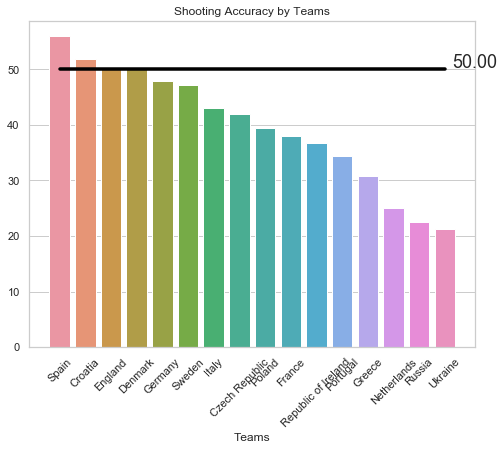

In [31]:
acc_idx = sort_shot_acc.index.tolist()
acc_val = sort_shot_acc.values.tolist()
# 기준 50% 이상 그래프 범위 설정
acc_val_range = np.arange(len(acc_idx))
acc_val_range[:] = 50

# barplot 크기 설정
plt.figure(figsize = (8,6))
# barplot 그리기
sns.barplot(acc_idx,acc_val)
# 슛 정확도 50% 기준선
plt.plot(np.arange(len(acc_idx)),acc_val_range, color = 'black', linewidth = 3.5)
# 기준선 텍스트 : plt.text(x위치,y위치,text값,글씨크기)
plt.text(15.3,50.2,"%.2f" % 50, fontsize = 18)
plt.xticks(rotation = 45)
plt.title("Shooting Accuracy by Teams")
plt.xlabel("Teams")
plt.show()

spain, croatia의 슈팅 정확도는 50%이상으로 나타났고 ukraine의 슛 정확도가 21%로 가장 낮았다.

In [18]:
# 슛 정확도와 골 수의 상관관계

goal_corr = euro[['Goals','Shooting Accuracy']].corr(method = 'pearson')
goal_corr

,Goals,Shooting Accuracy
Goals,1.00000,0.52121
Shooting Accuracy,0.52121,1.00000


골 수와 슈팅 정확도 간의 상관계수는 0.52로 나타났다.

In [19]:
cols = euro[['Goals','Shooting Accuracy','Shots on target','Shots off target','% Goals-to-shots']]
corr = cols.corr(method = 'pearson')
corr

,Goals,Shooting Accuracy,Shots on target,Shots off target,% Goals-to-shots
Goals,1.000000,0.521210,0.804193,0.403821,0.533239
Shooting Accuracy,0.521210,1.000000,0.504487,-0.269946,0.548827
Shots on target,0.804193,0.504487,1.000000,0.611185,0.049623
Shots off target,0.403821,-0.269946,0.611185,1.000000,-0.389095
% Goals-to-shots,0.533239,0.548827,0.049623,-0.389095,1.000000


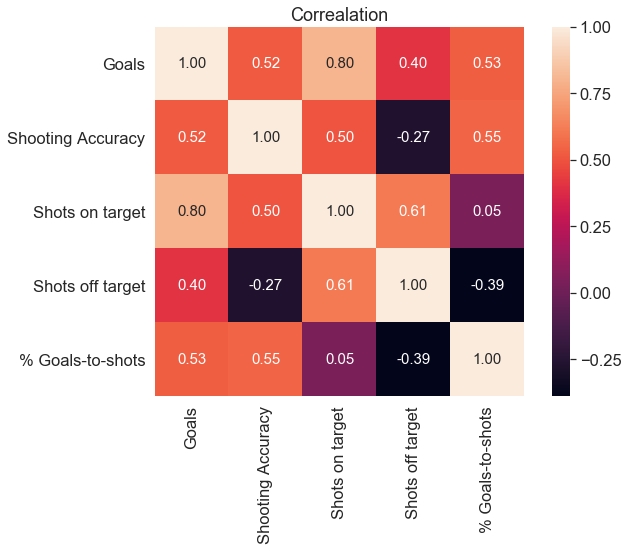

In [20]:
# 상관계수 시각화 : heatmap
cols_view = ['Goals','Shooting Accuracy','Shots on target','Shots off target','% Goals-to-shots']
plt.figure(figsize = (10,8))
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values,
                cbar = True, # 컬러바 그림 여부
                annot = True, # 각 네모 셀에 값을 쓸지 여부
                square = True, # 각 셀을 정사각형으로 쓸지 여부
                fmt = ".2f",
                annot_kws = {'size' :15},
                yticklabels = cols_view,
                xticklabels = cols_view)
plt.title("Correalation")
plt.tight_layout()
plt.show()

Goals와 유효 슛의 상관관계가 0.8로 가장 높았다.

<Figure size 864x720 with 0 Axes>

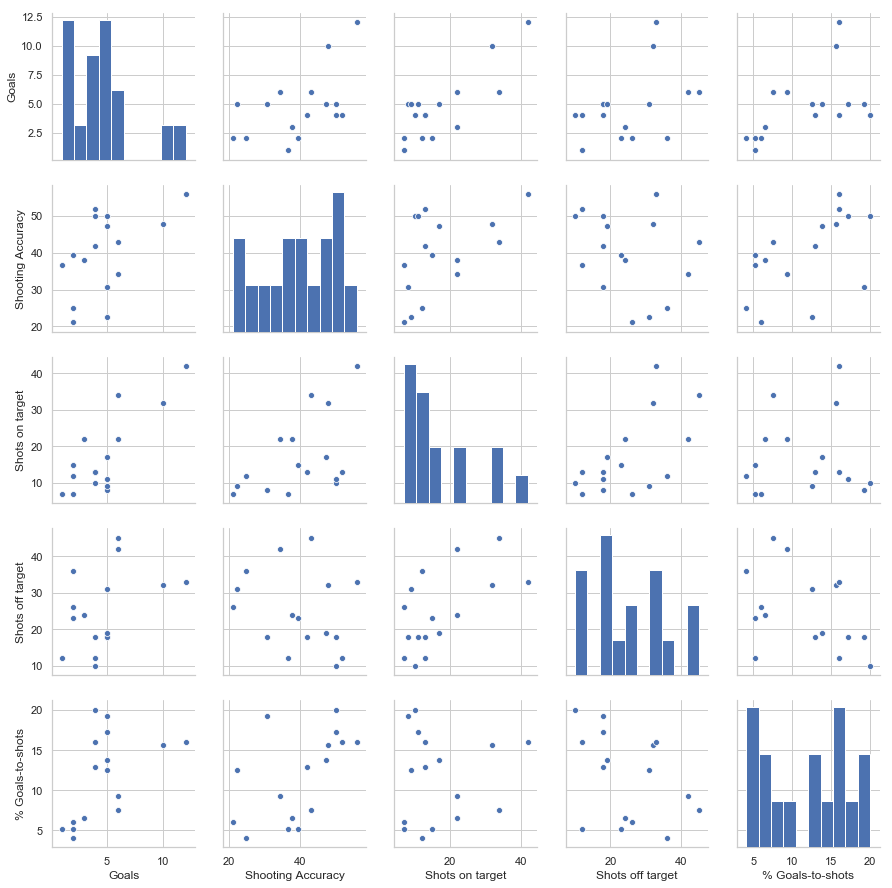

In [21]:
# 상관관계를 파악하기 위한 다른방법 : scatter plot 사용
plt.figure(figsize = (12,10))
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(euro[['Goals','Shooting Accuracy','Shots on target','Shots off target','% Goals-to-shots']])
plt.show()

### 국가별 패스 정확도


In [22]:
pass_acc = euro.groupby('Team')['Passing Accuracy'].sum()
sort_pass_acc = pass_acc.sort_values(ascending = False)
sort_pass_acc

Team
Netherlands            88.7
Spain                  88.4
Germany                87.4
France                 87.2
Russia                 83.9
Italy                  83.9
Denmark                83.3
Ukraine                81.7
Sweden                 80.9
England                80.6
Poland                 80.4
Czech Republic         78.1
Portugal               77.2
Croatia                76.9
Greece                 76.7
Republic of Ireland    71.2
Name: Passing Accuracy, dtype: float64

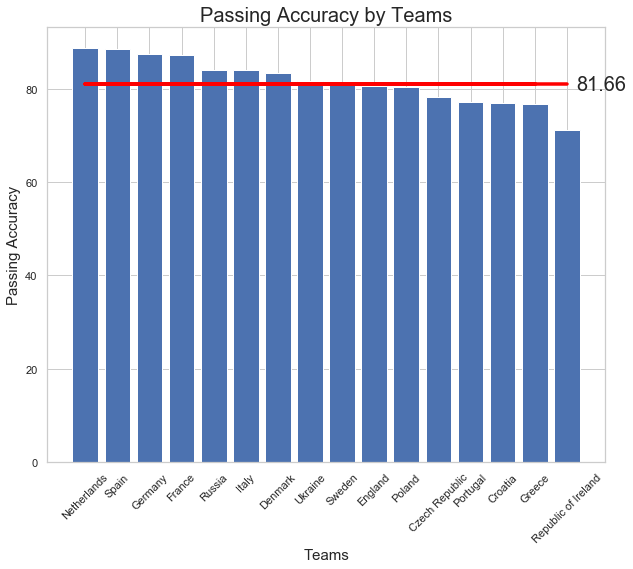

In [23]:
# pass_accuracy 그래프
x_pass = sort_pass_acc.index.tolist()
y_pass = sort_pass_acc.values.tolist()
mean_pass = euro.groupby('Team')['Passing Accuracy'].sum().mean()
mean_pass_list = np.arange(len(x_pass)).copy()
mean_pass_list[:] = mean_pass

plt.figure(figsize = (10,8))
plt.bar(x_pass,y_pass)
plt.plot(x_pos,mean_pass_list, color = 'red', linewidth = 3.5)
plt.text(15.3, mean_pass-2, "%.2f"% mean_pass,fontsize = 20)
plt.xticks(rotation = 45)
plt.title("Passing Accuracy by Teams", fontsize = 20)
plt.xlabel("Teams", fontsize = 15)
plt.ylabel("Passing Accuracy", fontsize = 15)
plt.show()

패스 정확도는 네덜란드가 가장 높았고 평균치 81.66보다 높은팀이 7팀으로 나타났다.

In [24]:
shot_acc

Team
Croatia                51.9
Czech Republic         41.9
Denmark                50.0
England                50.0
France                 37.9
Germany                47.8
Greece                 30.7
Italy                  43.0
Netherlands            25.0
Poland                 39.4
Portugal               34.3
Republic of Ireland    36.8
Russia                 22.5
Spain                  55.9
Sweden                 47.2
Ukraine                21.2
Name: Shooting Accuracy, dtype: float64

In [25]:
shot_pass = pd.DataFrame(data = list(zip(shot_acc,pass_acc)), index = shot_acc.index,
                        columns = ['Shot Accuracy','Pass Accuracy'])
shot_pass.head()

,Shot Accuracy,Pass Accuracy
Team,,
Croatia,51.9,76.9
Czech Republic,41.9,78.1
Denmark,50.0,83.3
England,50.0,80.6
France,37.9,87.2


In [26]:
shot_pass =  shot_pass.sort_values(by ='Pass Accuracy',axis = 0, ascending = False)
shot_pass.head()

,Shot Accuracy,Pass Accuracy
Team,,
Netherlands,25.0,88.7
Spain,55.9,88.4
Germany,47.8,87.4
France,37.9,87.2
Italy,43.0,83.9


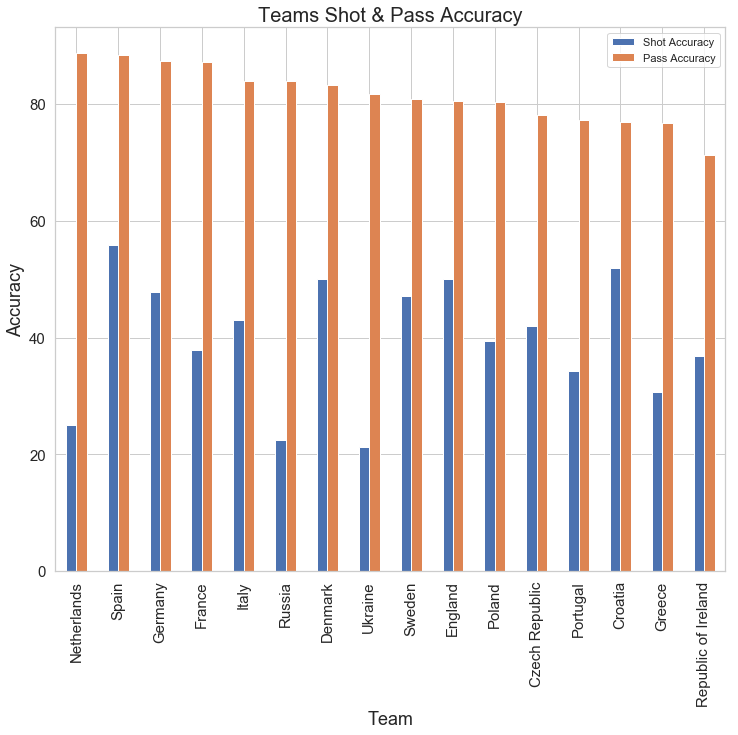

In [33]:
shot_pass.plot(kind = 'bar' , figsize = (12,10), sort_columns = 'Pass Accuracy', fontsize = 15)
plt.xlabel('Team', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.title('Teams Shot & Pass Accuracy', fontsize = 20)
plt.show()